<h1 style="color:purple">Heart Attack Analysis and Prediction</h1>

#### Data Dictionary



* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
    * trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    * thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack



* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

<h3 style='color:blue'>Import dependencies</h3>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings as wrn
wrn.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart (1).csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['thall'].value_counts()

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [5]:
pd.read_csv('o2Saturation.csv').head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


<h3 style='color:blue'>Exploratory Data Analysis</h3>

In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Insights :** This gives us the last five observations.

<h3 style='color:blue'>Info about the data</h3>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Insights :** We can see that there 13 independent feature available to find out the whether the patient will have the chance of heart attack or not.

<h3 style='color:blue'>Shape of the data</h3>

In [8]:
df.shape

(303, 14)

**Insights :** There are around 300 observation and 14 features in this data. 

<h3 style='color:blue'>Descriptive Statistics information about the data</h3>

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [68]:
max = df.describe().iloc[-1, : -1:]
min = df.describe().iloc[3, : -1:]

In [69]:
descr = pd.DataFrame([min, max])
values = descr.values.tolist()
columns = descr.columns

In [76]:
columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [80]:
descr.columns = ['Age', 'Sex', 'ChestPain', 'Bp', 'Chol', 'FastBloodSugar', 'restecg', 'Max Heart Rate', 'ExerciseInducedAnigma', 'Depression', 'Slope', 'Major Vessels', 'Thalassemia ']

In [81]:
values

[[29.0, 0.0, 0.0, 94.0, 126.0, 0.0, 0.0, 71.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [77.0, 1.0, 3.0, 200.0, 564.0, 1.0, 2.0, 202.0, 1.0, 6.2, 2.0, 4.0, 3.0]]

In [82]:
descr.to_csv('descriptive.csv')

In [83]:
values

[[29.0, 0.0, 0.0, 94.0, 126.0, 0.0, 0.0, 71.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [77.0, 1.0, 3.0, 200.0, 564.0, 1.0, 2.0, 202.0, 1.0, 6.2, 2.0, 4.0, 3.0]]

In [84]:
columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

<h3 style='color:blue'>Check for the unique value in the categorical variables</h3>

In [15]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

<h3 style='color:blue'>Check for the null values</h3>

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Insights :** We can see that there are no null values available in the dataset.

<h3 style='color:blue'>Changing the name of column for tha output variable to target.</h3>

In [17]:
df['target'] = df['output']

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'target'],
      dtype='object')

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


Now drop the old `output` column

In [20]:
df = df.drop(columns='output')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.shape

(303, 14)

<h3 style='color:blue'>Visualization that give overall insights</h3>

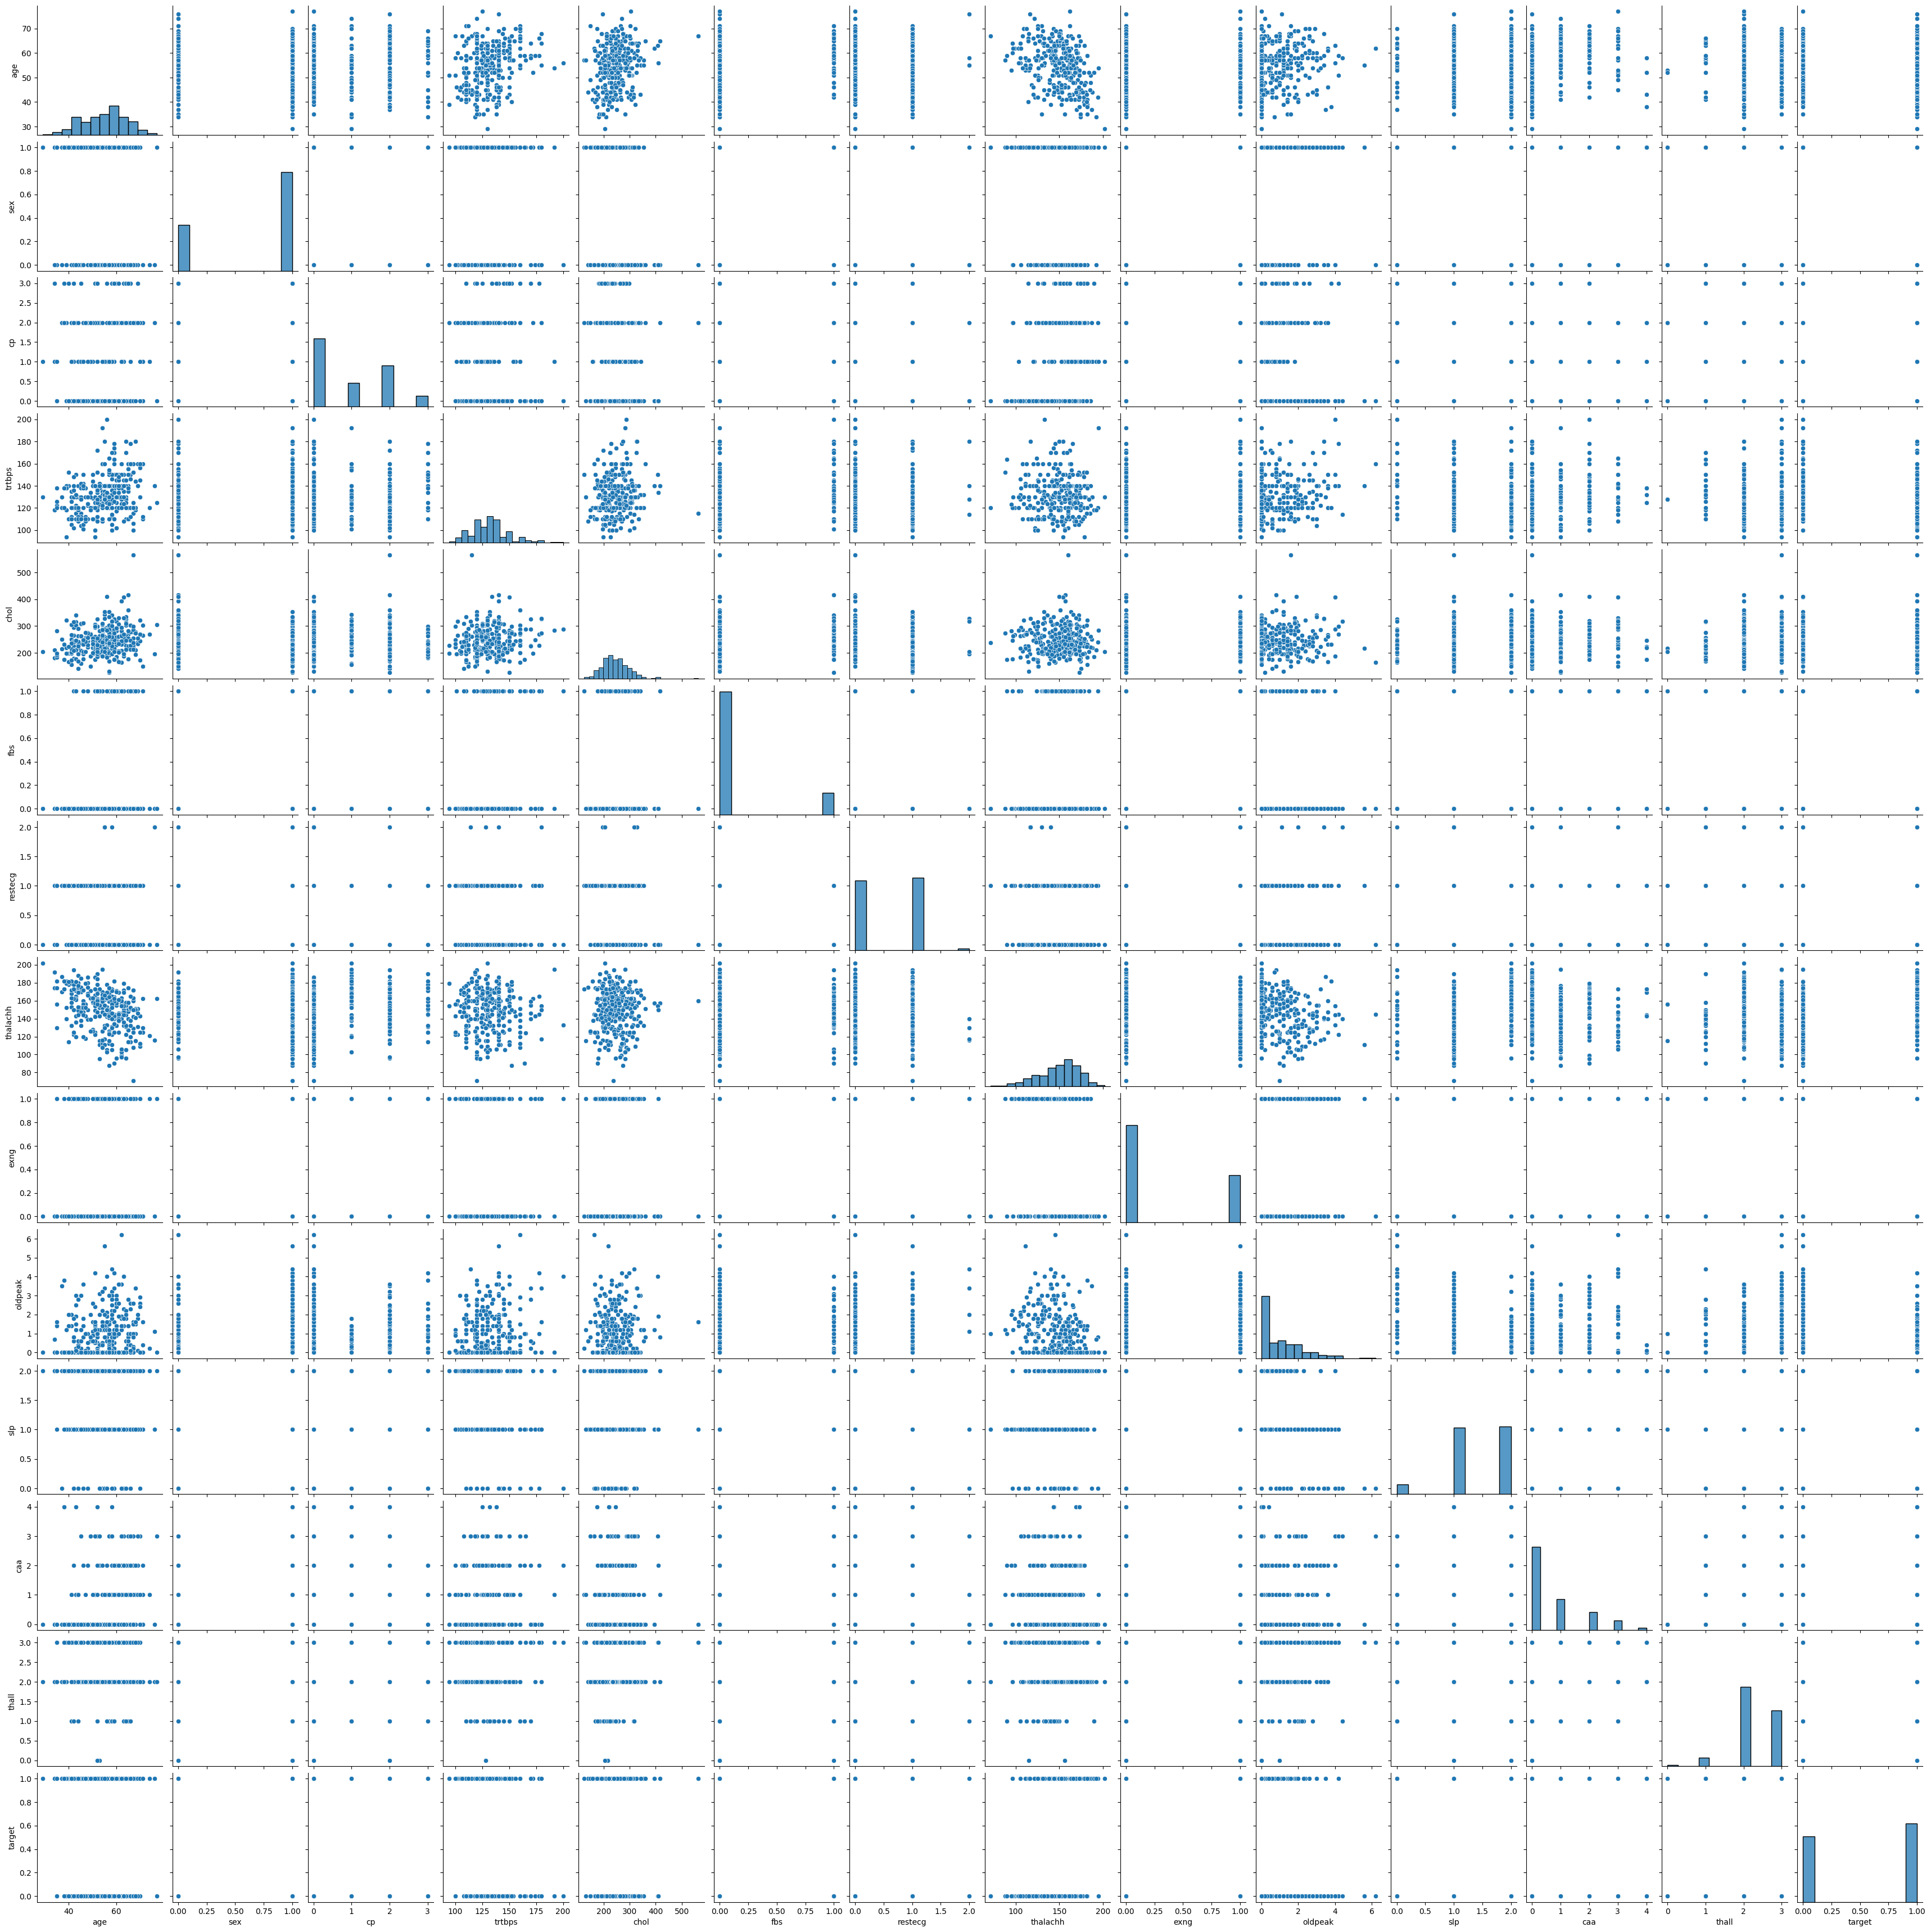

In [22]:
sns.pairplot(df)
plt.show()

<h3 style='color:blue'>Check whether data is imbalance or not</h3>

In [23]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

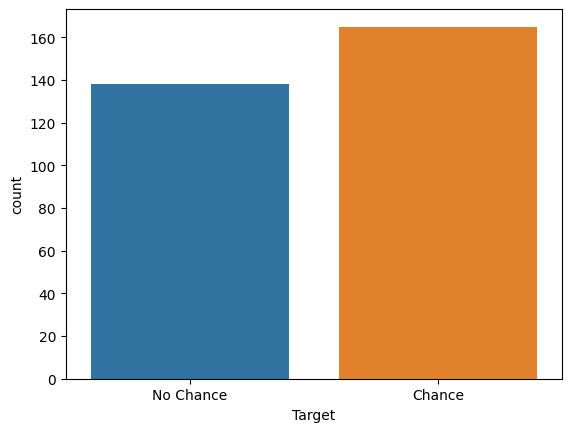

In [24]:
sns.countplot(x ='target', data=df)
plt.xticks(ticks = [0, 1], labels = ['No Chance','Chance'])
plt.xlabel('Target')
plt.show()

**Insights :** We can see that our data is not imbalanced.

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

<Axes: xlabel='age', ylabel='target'>

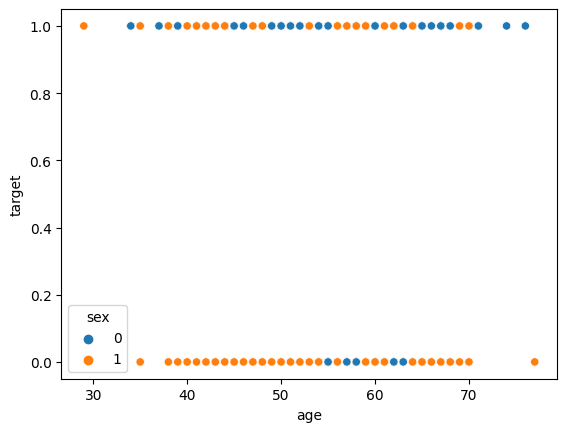

In [26]:
sns.scatterplot(x = 'age', y = 'target', data= df, hue='sex')

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

In [28]:
df[['sex']].value_counts()

sex
1      207
0       96
Name: count, dtype: int64

In [29]:
df[['cp']].value_counts()

cp
0     143
2      87
1      50
3      23
Name: count, dtype: int64

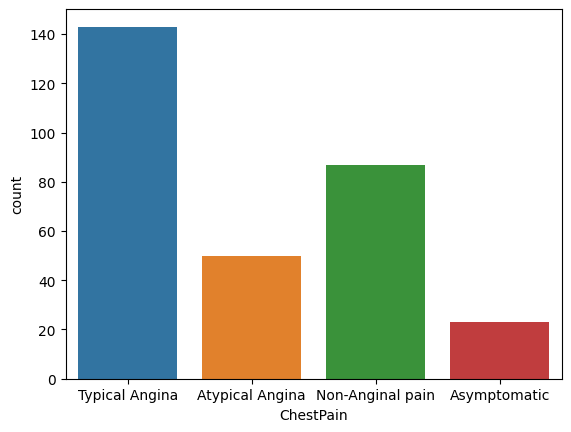

In [30]:
sns.countplot(x = 'cp', data=df)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal pain', 'Asymptomatic'])
plt.xlabel('ChestPain')
plt.show()

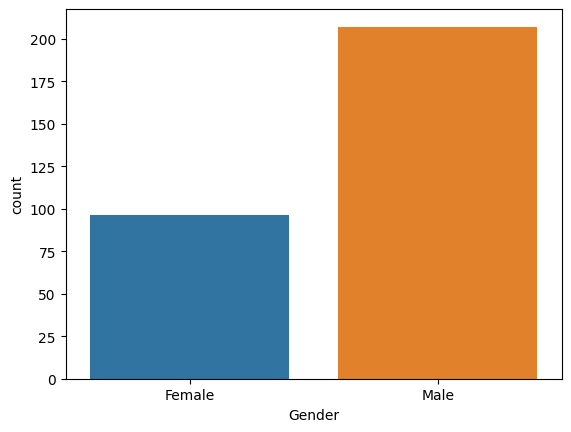

In [31]:
sns.countplot(x ='sex', data=df)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.show()

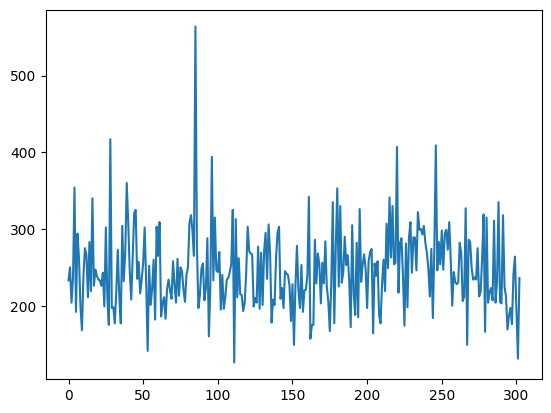

In [32]:
df['chol'].plot()
plt.show()

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

<Axes: >

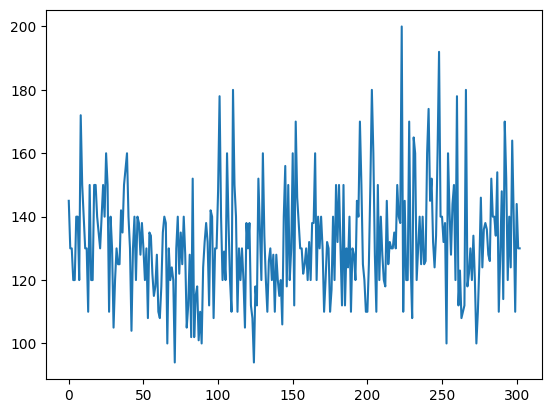

In [34]:
df['trtbps'].plot()

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

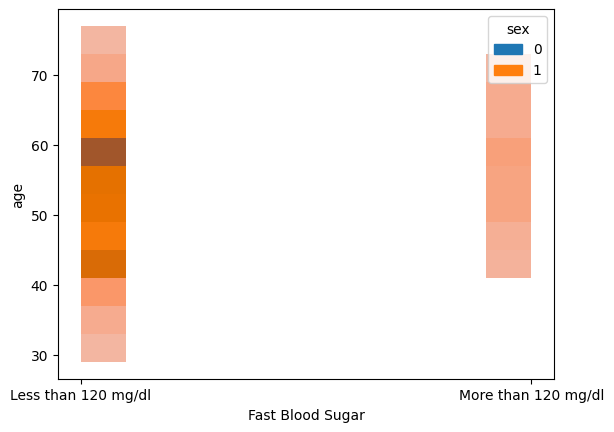

In [36]:
sns.histplot(x = 'fbs', y ='age',  hue='sex', data=df)
plt.xticks(ticks= [0, 1], labels=['Less than 120 mg/dl', 'More than 120 mg/dl'])
plt.xlabel('Fast Blood Sugar')
plt.show()

In [37]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

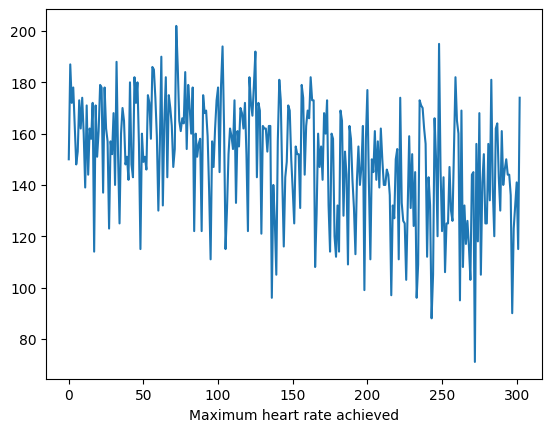

In [38]:
df['thalachh'].plot()
plt.xlabel("Maximum heart rate achieved")
plt.show()

In [39]:
np.min(df['thalachh']), np.max(df['thalachh'])

(71, 202)

**Insights :** We can see that maximum heart rate is from 71 to 202.

<Axes: >

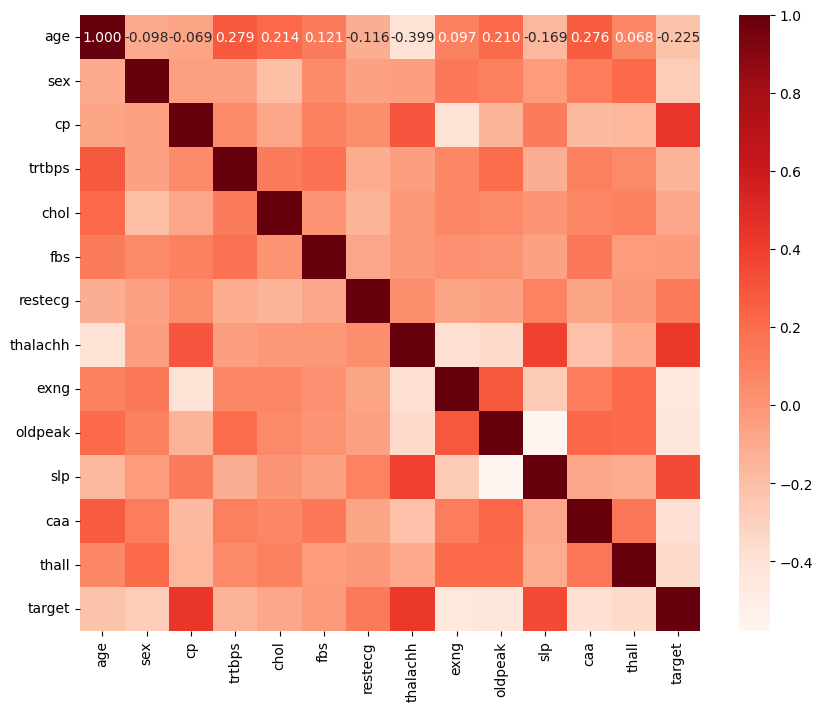

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap= 'Reds', annot=True, fmt='0.3f', annot_kws = {'size' :10})

<h3 style='color:blue'>Categorical Encoding</h3>

In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

In [42]:
categorical_columns = ['sex','exng','ca','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

In [43]:
# for categorical in categorical_columns:
#     df[categorical] = df[categorical].astype('object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3 style='color:blue'>Dependent and Independent variables</h3>

In [45]:
X = df.drop(columns='target')
y = df['target']

In [46]:
X.head() , y.head()

(   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  
 0    0      1  
 1    0      2  
 2    0      2  
 3    0      2  
 4    0      2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

<h3 style='color:blue'>Split the data into train and test</h3>

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

<h3 style='color:blue'>Scaling the value in the such a way that it's mean is 0 and std is 1</h3>

In [48]:
sc = StandardScaler()
lg_train = sc.fit_transform(X_train)
lg_test = sc.transform(X_test)

In [49]:
np.mean(lg_test), np.std(lg_test), np.max(lg_test)

(-0.036498208658140074, 0.9358809318552924, 3.9682354915652653)

<h3 style='color:blue'>Selecting the Model for training</h3>

In [50]:
import joblib
models_name = ['Logistic_Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
models = { LogisticRegression(),
          DecisionTreeClassifier(),
         RandomForestClassifier(),
           XGBClassifier() }
# models = {'Logistic Regression' : LogisticRegression(),
#          'Decision Tree' : DecisionTreeClassifier(),
#          'Random Forest' : RandomForestClassifier(),
#          'XGBoost' : XGBClassifier() }

# Train the Model
score = {}
for name in models_name:
    for model  in models:
        if model == LogisticRegression():
            train = model.fit(X_train, y_train)
            pred = train.predict(X_test)
            joblib.dump(train, name + ".joblib")
            score[name] = accuracy_score(y_test, pred)
        else:
            train = model.fit(X_train, y_train)
            pred = train.predict(X_test)
            joblib.dump(train, name + ".joblib")
            score[name] = accuracy_score(y_test, pred)

In [51]:
score

{'Logistic_Regression': 0.75,
 'Decision Tree': 0.75,
 'Random Forest': 0.75,
 'XGBoost': 0.75}

In [52]:
import joblib
models_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
models = { LogisticRegression(),
          DecisionTreeClassifier(),
         RandomForestClassifier(),
           XGBClassifier() }
# models = {'Logistic Regression' : LogisticRegression(),
#          'Decision Tree' : DecisionTreeClassifier(),
#          'Random Forest' : RandomForestClassifier(),
#          'XGBoost' : XGBClassifier() }

# Train the Model
scaled_score = {}
for name in models_name:
    for model  in models:
        if model == LogisticRegression():
            train = model.fit(lg_train, y_train)
            pred = train.predict(lg_test)
            joblib.dump(train, name + "scale.joblib")
            scaled_score[name] = accuracy_score(y_test, pred)
        else:
            train = model.fit(lg_train, y_train)
            pred = train.predict(lg_test)
            joblib.dump(train, name + "scale.joblib")
            scaled_score[name] = accuracy_score(y_test, pred)
            
scaled_score

{'Logistic Regression': 0.8157894736842105,
 'Decision Tree': 0.868421052631579,
 'Random Forest': 0.868421052631579,
 'XGBoost': 0.868421052631579}

<Axes: >

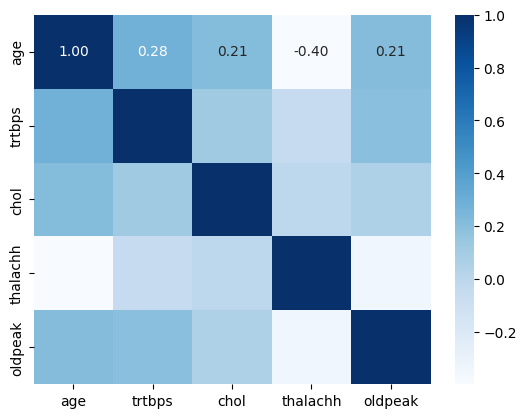

In [53]:
cat_cols = ['sex','exng','ca','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

df[con_cols].corr()

sns.heatmap(df[con_cols].corr(), annot=True, cmap='Blues', fmt='0.2f')

<Figure size 1200x1200 with 0 Axes>

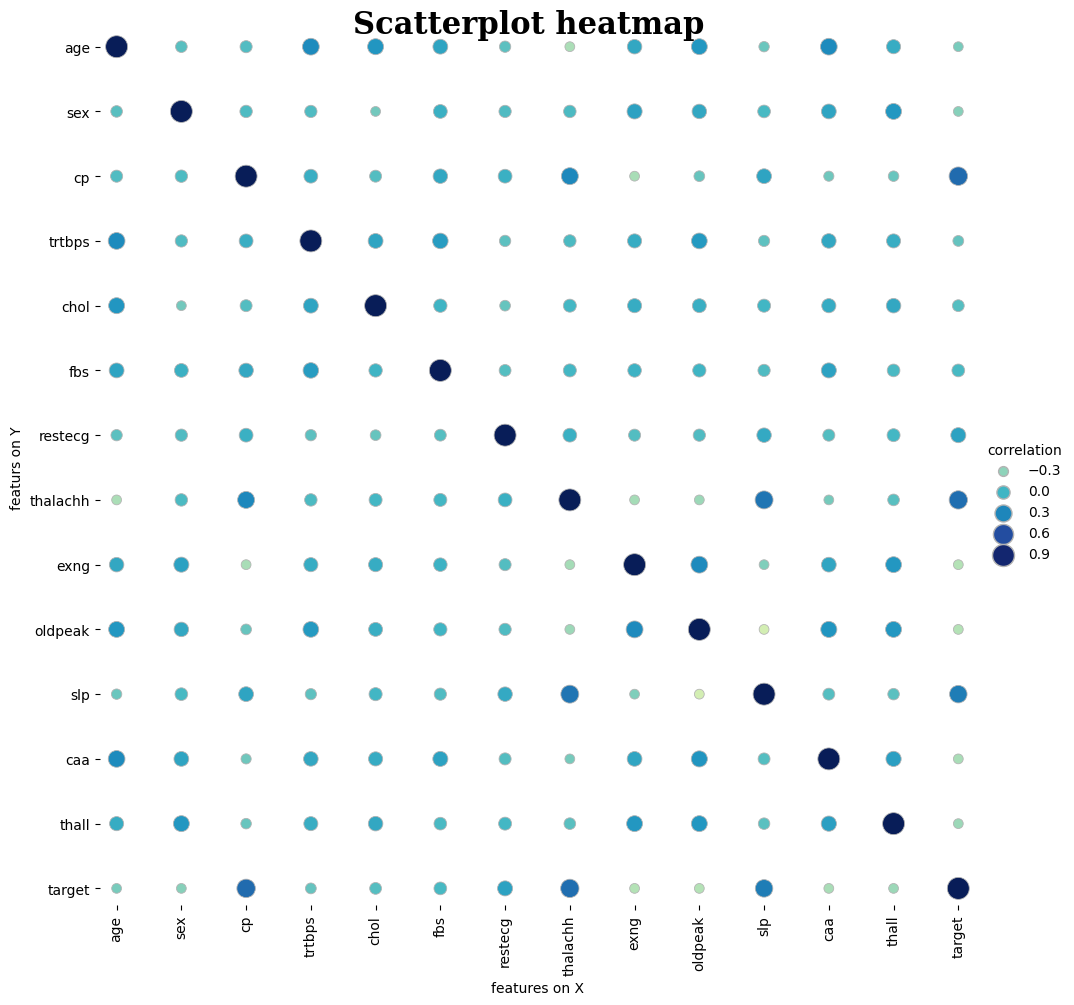

In [54]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix



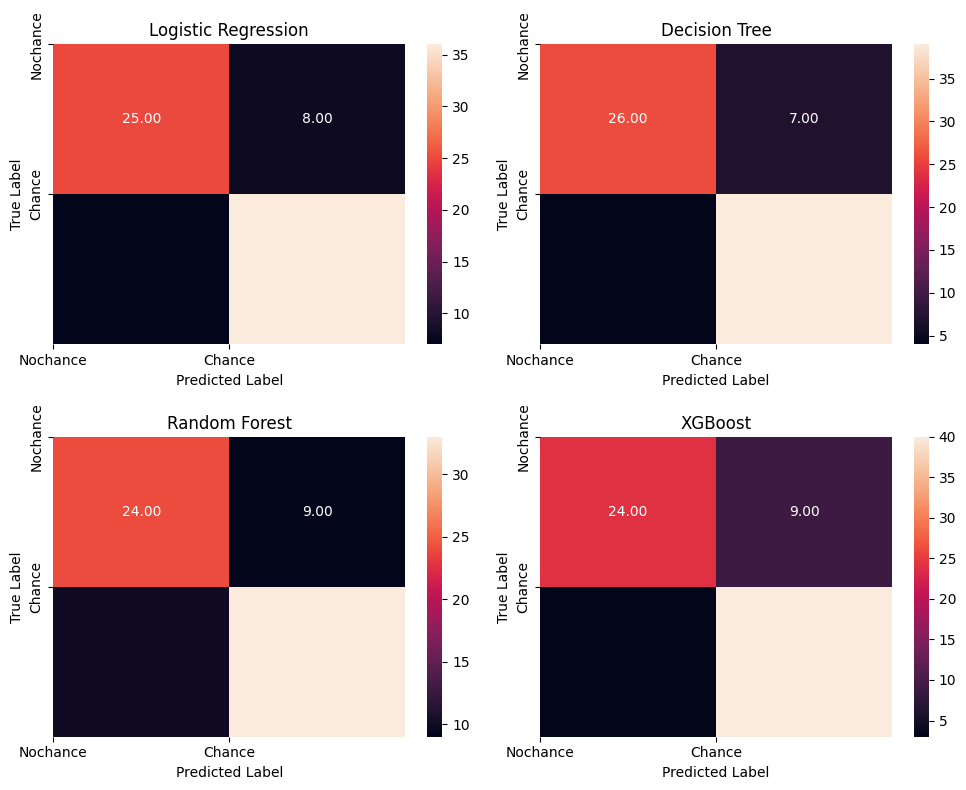

In [56]:
import joblib
models_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
models = { LogisticRegression(),
          DecisionTreeClassifier(),
         RandomForestClassifier(),
           XGBClassifier() }

score = {}
plt.figure(figsize=(10, 8))
for i, model in enumerate(models, 1):
    train = model.fit(X_train, y_train)
    pred = train.predict(X_test)
    plt.subplot(2,2,i)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="0.2f")
    plt.xticks(ticks=[0, 1], labels =['Nochance', 'Chance'])
    plt.yticks(ticks=[0, 1], labels =['Nochance', 'Chance'])
    plt.title(models_name[i -1])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

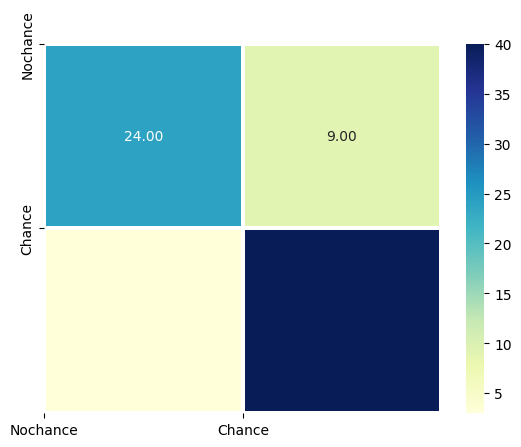

In [57]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
pred = log_model.predict(X_test)
cm =confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='0.2f',linewidths=1.5, cmap='YlGnBu')
plt.xticks(ticks=[0, 1], labels =['Nochance', 'Chance'])
plt.yticks(ticks=[0, 1], labels =['Nochance', 'Chance'])
plt.show()


In [58]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [59]:
df['caa'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [60]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [62]:
df['exng'].value_counts()

exng
0    204
1     99
Name: count, dtype: int64

In [63]:
df['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [64]:
df['slp'].unique()

array([0, 2, 1], dtype=int64)

In [65]:
df['thall'].value_counts()

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [66]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [65]:
df['thall'].value_counts()

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [85]:
import pytz
indian_time = pytz.timezone('Asia/Kolkata')

In [86]:
indian_time

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

In [88]:
from datetime import datetime
datetime.now(indian_time)

datetime.datetime(2023, 12, 19, 17, 5, 9, 673255, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)